In [1]:
%matplotlib inline
import pandas as pd

In [2]:
# df = pd.read_csv("bio/DNA.txt", index_col=False, header=0)
seq = ""
with open("DNA.txt") as file:
    for line in file:
        if line[0] is '>':
            print(line)
        else:
            seq = line

>dm3gene_dna range=contig1:1-11000 5'pad=0 3'pad=0 strand=+ repeatMasking=none



In [3]:
# create a row from each entry in dictionary
d = {
    'A': [],
    'C': [],
    'G': [],
    'T': [],
}

for s in seq:
    d[s].append(1)
    for k in d.keys():
        if k is not s:
            d[k].append(0)

In [45]:
df = pd.DataFrame(d)
df.head()
df.size

44000

In [100]:
total_gc = df.C.mean() + df.G.mean()
print("GC content of this sequence is: ", total_gc)
# I verified this here https://www.sciencebuddies.org/science-fair-projects/references/genomics-g-c-content-calculator

GC content of this sequence is:  0.480909090909


In [108]:
s = int(df.shape[0])
window_size = int(s / 20)

def get_averages(offset=0, print_me=False):
    rolling_avg = []
    window = []
    for i in range(offset, s, window_size):
        gc = df.iloc[i : i + window_size].G.mean() + df.iloc[i : i + window_size].C.mean()
        if print_me:
            print("window: ", i, i + window_size, "\t the gc content is: ", gc)
        rolling_avg.append(gc)
        window.append((i, i+window_size))
    return rolling_avg, window
    

In [109]:
# rolling_avg0, window0 = get_averages()
# rolling_avg1, window1 = get_averages(offset=int(s/66.6)) # approximately 1.5%


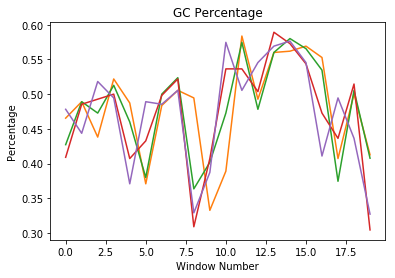

In [117]:
import matplotlib.pyplot as plt
plt.plot(total_gc)
off = int(s/66.6)

for o in range(0, window_size, off):
    plt.plot(get_averages(offset=o)[0])

plt.ylabel('Percentage')
plt.xlabel('Window Number')
plt.title('GC Percentage')
plt.show()
